In [ ]:
import numpy as np

# generate gaussian random numbers
n_sam = 1E8
x = np.random.normal(0, 1, int(n_sam))
y = np.random.normal(0, 1, int(n_sam))
z = np.random.normal(0, 1, int(n_sam))

integral = 0
for i in range(int(n_sam)):
    integral += (x[i]+y[i]+z[i])**2
val_sam = 1/n_sam*(integral)*np.sqrt(2*np.pi)**3

val_exact = 12*np.pi*np.sqrt(2*np.pi)/2

print(r"The sampled value is: ", round(val_sam,5))
print(r"The exact value is:   ", round(val_exact,5))

In [ ]:
# get variance
import matplotlib.pyplot as plt
N_values = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
variances = []

def get_variance(values):
    var = np.var(values)
    return var

for N in N_values:
    # Calculate value for 10 different chains
    samples = 10
    integrals = np.zeros(samples)
    for sample in range(samples):
        x = np.random.normal(0, 1, int(N))
        y = np.random.normal(0, 1, int(N))
        z = np.random.normal(0, 1, int(N))
        
        integral = 0
        for i in range(int(N)):
            integral += (x[i]+y[i]+z[i])**2
        val_sam = 1/n_sam*(integral)*np.sqrt(2*np.pi)**3
        integrals[sample] += val_sam
    variance = get_variance(integrals)
    variances.append(variance)

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(N_values, variances, color='black', label='Variances')
    

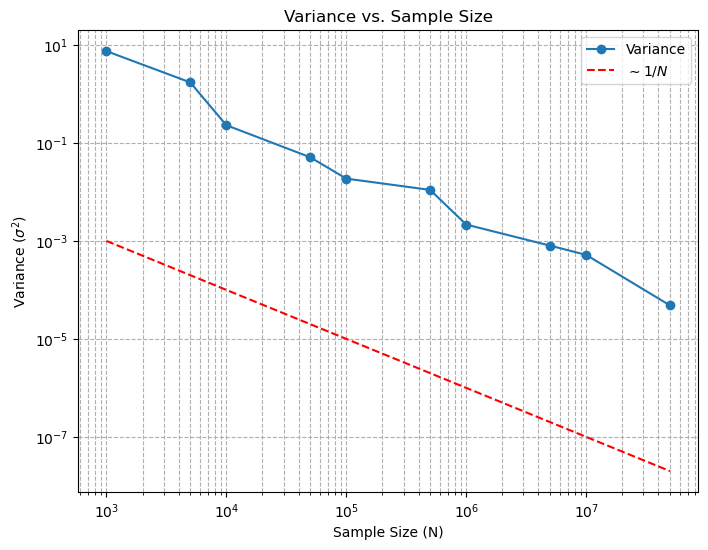

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for the Monte Carlo integral
def monte_carlo_integral(N):
    # Generate Gaussian random numbers
    x = np.random.normal(0, 1, N)
    y = np.random.normal(0, 1, N)
    z = np.random.normal(0, 1, N)

    # Compute the function values
    values = (x + y + z) ** 2

    # Return the estimated integral value
    return np.mean(values) * np.sqrt(2 * np.pi) ** 3

# Parameters for different sample sizes
sample_sizes = [10**3, 5*10**3, 10**4, 5*10**4, 10**5, 5*10**5, 10**6, 5*10**6, 10**7, 5*10**7]
variances = []

# Perform multiple runs for each sample size to calculate variance
n_runs = 10  # Number of runs for variance calculation

for N in sample_sizes:
    estimates = []
    for _ in range(n_runs):
        estimate = monte_carlo_integral(N)
        estimates.append(estimate)
    
    # Calculate variance of the estimates
    variance = np.var(estimates)
    variances.append(variance)

# Plot the variance against sample size
plt.figure(figsize=(8, 6))
plt.loglog(sample_sizes, variances, 'o-', label='Variance')
plt.loglog(sample_sizes, [1/N for N in sample_sizes], 'r--', label=r'$\sim 1/N$')  # Reference 
plt.xlabel('Sample Size (N)')
plt.ylabel('Variance ($\sigma^2$)')
plt.title('Variance vs. Sample Size')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig('Plots/ex3_get_variance_plot.png', dpi=300)
plt.show()